In [1]:
import pandas as pd

In [2]:
import glob

In [3]:
import os

In [4]:
cts = pd.DataFrame()

In [5]:
for table in glob.glob("resources/capacity_tables/*csv"):
    iteration = int(os.path.splitext(os.path.basename(table))[0])
    cts[iteration] = pd.read_csv(table, index_col=[0,1]).p_nom

In [6]:
cts.sort_index(axis=1, inplace=True)

In [7]:
cts = cts[range(11)]

In [8]:
rr_existing = pd.DataFrame()

In [9]:
for file in glob.glob("results/revenue_ratios/*exist*"):
    iteration = int(os.path.basename(file).split("_")[0])
    rr_existing[iteration] = pd.read_csv(file, index_col=0).unstack()

In [10]:
rr_existing.sort_index(axis=1, inplace=True)

In [11]:
rr_existing = rr_existing[cts.columns[1:]]

In [12]:
remaining = rr_existing[cts.loc[rr_existing.index, cts.columns[-1]] > 0.01].dropna(how="all").index

In [13]:
dynamic = cts.loc[remaining][cts.loc[remaining, 0] != cts.loc[remaining, cts.columns[-1]]].index

In [14]:
rr_existing.loc[dynamic].clip(upper=1, lower=-1).iloc[:, 3:].sum(axis=1).sort_values().filter(like="IT", axis=0)

ITN1 OCGT exit 2034  2025   -5.0
                     2027   -5.0
                     2026   -5.0
ITCA CCGT exit 2034  2027   -3.0
                     2025   -3.0
                     2026   -3.0
ITN1 CCGT exit 2034  2026   -3.0
ITCS CCGT exit 2034  2025   -1.0
ITN1 CCGT exit 2034  2027   -1.0
                     2025   -1.0
ITCS CCGT exit 2034  2026   -1.0
                     2027    1.0
dtype: float64

In [23]:
cts.loc[dynamic].diff(axis=1).iloc[:, 4:].sum(axis=1).div(
    cts.loc[dynamic].diff(axis=1).iloc[:, 4:].abs().sum(axis=1)

).sort_values(ascending=False).iloc[:10]

Generator                
RO00 CCGT exit 2034  2027    0.785714
                     2025    0.785714
                     2026    0.785714
GR00 CCGT exit 2034  2025    0.738095
ITCS CCGT exit 2034  2026    0.738095
                     2027    0.738095
PL00 coal exit 2034  2027    0.738095
                     2026    0.738095
                     2025    0.738095
GR00 CCGT exit 2034  2027    0.738095
dtype: float64

In [42]:
cts.loc[dynamic].diff(axis=1).iloc[:, 7:].abs().sum(axis=1).sort_values()

Generator                
BE00 CCGT exit 2034  2027      0.0
                     2025      0.0
                     2026      0.0
AT00 CCGT exit 2034  2025    150.0
UKNI oil exit 2034   2025    350.0
                             ...  
UKNI OCGT exit 2034  2025    350.0
                     2026    350.0
UK00 OCGT exit 2034  2025    350.0
                     2026    350.0
                     2027    350.0
Length: 87, dtype: float64

In [44]:
cts.loc[dynamic].diff(axis=1).iloc[:, 7:].sum(axis=1).div(
    cts.loc[dynamic].diff(axis=1).iloc[:, 7:].abs().sum(axis=1).add(1e-6)
).sort_values()

Generator                
DE00 CCGT exit 2034  2025   -1.000000
ES00 CCGT exit 2034  2025   -1.000000
DE00 CCGT exit 2034  2027   -1.000000
                     2026   -1.000000
ES00 CCGT exit 2034  2026   -1.000000
                               ...   
AT00 CCGT exit 2028  2025    0.142857
UKNI CCGT exit 2034  2027    0.285714
                     2025    0.285714
                     2026    0.285714
UK00 CCGT exit 2028  2025    0.285714
Length: 87, dtype: float64

In [48]:
plant = "DE00 CCGT exit 2034"

In [44]:
all_negs = rr_existing.loc[dynamic, range(4, rr_existing.columns[-1])].max(axis=1)[rr_existing.loc[dynamic, range(4,  rr_existing.columns[-1])].max(axis=1)<0].index

In [47]:
cts.loc[all_negs].diff(axis=1)

0       1       2       3      4      5      6   \
Generator                                                                   
DE00 CCGT exit 2034 2025 NaN -4000.0 -2000.0 -1000.0 -500.0 -250.0 -125.0   
ES00 CCGT exit 2034 2025 NaN -4000.0 -2000.0 -1000.0 -500.0 -250.0 -125.0   
                    2026 NaN -4000.0 -2000.0 -1000.0 -500.0 -250.0 -125.0   
                    2027 NaN -4000.0 -2000.0 -1000.0 -500.0 -250.0 -125.0   
ITN1 CCGT exit 2034 2025 NaN -4000.0  2000.0 -1000.0 -500.0 -250.0 -125.0   
                    2026 NaN -4000.0  2000.0 -1000.0 -500.0 -250.0 -125.0   

                            7     8     9     10    11    12    13    14  
Generator                                                                 
DE00 CCGT exit 2034 2025 -75.0  75.0 -75.0 -75.0 -75.0 -75.0  75.0 -75.0  
ES00 CCGT exit 2034 2025 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0  
                    2026 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0  
                    2027 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0 -75.0  
ITN1 CCGT exit 2034 2025 -75.0 -75.0 -75.0  75.0 -75.0 -75.0  75.0 -75.0  
                    2026 -75.0 -75.0 -75.0  75.0 -75.0 -75.0  75.0 -75.0

<AxesSubplot:>

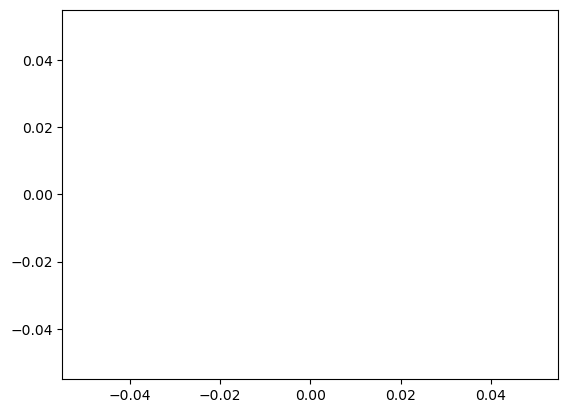

In [48]:
cts.loc[dynamic].sum().loc[35:].plot()

In [49]:
rr_existing.loc[all_negs]

1            2            3            4   \
DE00 CCGT exit 2034 2025 -11659.866285  -587.594489 -7348.662761  -369.145106   
ES00 CCGT exit 2034 2025  -5696.310279 -7510.699775 -6839.331017 -6075.530634   
                    2026  -8206.913915 -7811.346947 -6936.851529 -6313.242928   
                    2027  -9042.146130 -7908.625946 -6957.705922 -6396.143898   
ITN1 CCGT exit 2034 2025  -8701.024502  6251.095939 -5259.349906 -2165.085256   
                    2026  -8739.635927  2458.501682 -5294.194906 -3346.347338   

                                   5            6            7            8   \
DE00 CCGT exit 2034 2025  -600.292012 -4264.536349  -497.349675 -1546.968801   
ES00 CCGT exit 2034 2025 -6157.741376 -6019.228491 -5936.063755 -5920.446803   
                    2026 -6231.468027 -6012.091718 -6027.652478 -5991.224525   
                    2027 -6266.928782 -6092.054832 -6073.543772 -6030.578853   
ITN1 CCGT exit 2034 2025 -3357.143991 -4072.107035 -4048.564326 -3738.918273   
                    2026 -3284.870834 -3496.763253 -3793.334292 -3787.015374   

                                   9            10           11           12  \
DE00 CCGT exit 2034 2025 -2461.211652  -434.167382  -514.868706 -3757.245912   
ES00 CCGT exit 2034 2025 -5913.303610 -5861.105536 -5796.331357 -5619.146536   
                    2026 -5988.614155 -5944.561244 -5874.524471 -3479.267484   
                    2027 -6002.036767 -5961.551556 -5901.672821 -4215.957946   
ITN1 CCGT exit 2034 2025  -928.014916 -3972.600314 -3193.216423 -2559.050059   
                    2026 -2533.804213 -3459.244705 -3649.093027 -1297.293316   

                                   13           14  
DE00 CCGT exit 2034 2025 -2434.685943 -2494.786234  
ES00 CCGT exit 2034 2025 -5792.830249 -5738.942692  
                    2026 -5835.942173 -5800.441366  
                    2027 -1616.905519 -5823.164123  
ITN1 CCGT exit 2034 2025 -3315.069617 -3333.506998  
                    2026 -3670.200727 -3714.852208

In [50]:
rr_new = pd.DataFrame()

In [51]:
for file in glob.glob("results/revenue_ratios/*new*"):
    iteration = int(os.path.basename(file).split("_")[0])
    rr_new[iteration] = pd.read_csv(file, index_col=0)["0"]

In [52]:
rr_new.sort_index(axis=1, inplace=True)

In [40]:
lole = pd.DataFrame()

In [41]:
for file in glob.glob("results/lole/**/*"):

    iteration = file.split("/")[2]
    climate_year = file.split("cy")[1][:4]
    target_year = file.split("ty")[1][:4]
    lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lole[" ".join([target_year, climate_year, iteration])] = pd.read_csv(file, index_col=0)["0"]
/tmp/ipykernel_3339297/4057654764.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [42]:
lole = lole.T.set_index([[i.split(" ")[j] for i in lole.columns] for j in range(3)])

In [43]:
lole.index = lole.index.set_levels(lole.index.levels[0].astype(int), level=0)
lole.index = lole.index.set_levels(lole.index.levels[1].astype(int), level=1)
lole.index = lole.index.set_levels(lole.index.levels[2].astype(int), level=2)

In [44]:
lole.columns = lole.columns.str[:4]

In [49]:
lole.groupby(level=[0,2]).mean().filter(like="AT").unstack(0)

Generator  AT00            
           2025  2026  2027
0           0.0   0.0   0.0
1          54.4  42.6  47.4
2          11.0   9.0  14.4
3           7.2   6.0  14.2
4           7.4  11.4  14.2
5          14.6  14.8  14.0
6           8.4  13.8   8.0
7           9.0   6.4  13.6
8          10.6  10.4   8.2
9           9.8   8.6  12.4
10         11.0  12.2   8.2
11          9.4  11.8  11.6
12         12.8  10.6  11.8
13         10.8  13.2  16.6
14          8.6  12.8   9.4
15          9.2  11.6   9.4
16         10.2  11.8   9.2
17          6.2  12.0   7.6
18          9.6  11.8  11.4
19         13.2  13.4   8.4
20         13.4  11.2  11.6
21         12.6   9.6   7.8
22         12.2  11.8   8.0
23         12.2  12.0  12.6
24          9.8  10.6   7.6
25          9.2   9.0   8.0
26          9.0  10.8  13.6
27          5.2  10.2   9.4
28          8.2   9.6   8.0
29         17.8  15.0   8.2
30         15.2   9.6   9.0
31         10.2  13.8  10.6
32          8.6  14.2   9.2
33         13.2   8.6  11.4
34          9.8  10.2  10.4
35          9.4   9.8   9.2
37          0.2   0.6   0.0
38          4.8   4.4   0.0
39          0.0   0.6   0.6
40          0.0   0.0   0.6
41          4.4   0.0   5.0
42          4.0   0.8   0.2
43          0.0   0.0   0.6
44          4.8   0.4   0.8
45          0.4   0.0   0.0
46          0.0   0.4   0.0
47          0.4   0.0   0.0
48          0.4   0.0   0.2
49          1.0   0.0   1.2

In [90]:
pd.read_csv("data/capacity_adjustement_size.csv")

,iteration,capacity_change
0,1.0,8000
1,2.0,4000
2,3.0,2000
3,4.0,1000
4,5.0,500
...,...,...
146,147.0,75
147,148.0,75
148,149.0,75
149,150.0,75


<AxesSubplot:>

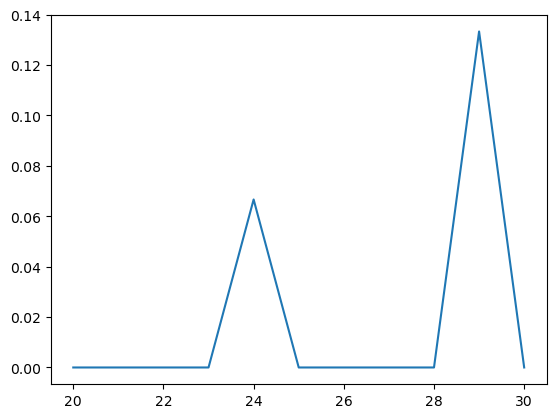

In [34]:
lole.groupby(level=[2]).mean().loc[20:30].DE00.plot()

In [35]:
bus = "DE00"

In [36]:
rr_existing.filter(like=bus, axis=0).loc[:, range(20,31)].T

DE00 CCGT exit 2033                     DE00 CCGT exit 2034               \
                  2025      2026      2027                2025         2026   
20           -0.063275 -0.064780 -0.065322        -4987.600139 -5693.371117   
21           -0.063622 -0.064833 -0.065303        -5445.167808 -5835.520860   
22           -0.063823 -0.064996 -0.065441        -5917.568691 -5961.873980   
23           -0.063703 -0.064868 -0.065327        -5707.350059 -5831.296442   
24           -0.063642 -0.064793 -0.065284        -5482.172875 -5667.794250   
25           -0.061970 -0.063998 -0.064731        -2737.314178 -4250.786071   
26           -0.063967 -0.065009 -0.065399        -5566.656446 -5594.682345   
27           -0.063769 -0.064861 -0.065268        -5379.392948 -5459.061733   
28           -0.063814 -0.064838 -0.065241        -5294.263623 -5358.332101   
29           -0.063599 -0.064587 -0.064992        -4844.830587 -4949.301605   
30           -0.059153 -0.062604 -0.063676         1850.639424 -1704.526712   

                DE00 OCGT exit 2033                     DE00 OCGT exit 2034  \
           2027                2025      2026      2027                2025   
20 -5830.512860           -0.273451 -0.277870 -0.279424           -0.273451   
21 -5898.068798           -0.274673 -0.278078 -0.279399           -0.274673   
22 -5947.947986           -0.275495 -0.278678 -0.279894           -0.275495   
23 -5819.585019           -0.275044 -0.278258 -0.279535           -0.275044   
24 -5684.138134           -0.274925 -0.278081 -0.279440           -0.274925   
25 -4692.825121           -0.268853 -0.275179 -0.277435           -0.268853   
26 -5552.854016           -0.275891 -0.278719 -0.279779           -0.275891   
27 -5400.640820           -0.275343 -0.278322 -0.279408           -0.275343   
28 -5298.888866           -0.275453 -0.278202 -0.279296           -0.275453   
29 -4912.726915           -0.274698 -0.277338 -0.278428           -0.274698   
30 -2682.946383           -0.258772 -0.270168 -0.273668           -0.258772   

    ... DE00 lignite exit 2030 DE00 oil exit 2028                      \
    ...                   2027               2025      2026      2027   
20  ...           13308.380643          -0.288392 -0.293940 -0.295963   
21  ...           13349.721688          -0.289570 -0.294055 -0.295825   
22  ...           13279.324760          -0.290163 -0.294645 -0.296342   
23  ...           13295.763143          -0.289705 -0.294134 -0.295893   
24  ...           13354.655579          -0.289584 -0.293914 -0.295777   
25  ...           13853.283451          -0.283982 -0.291278 -0.293941   
26  ...           13258.894254          -0.290735 -0.294715 -0.296217   
27  ...           13422.934799          -0.290031 -0.294187 -0.295755   
28  ...           13450.343110          -0.290217 -0.294086 -0.295646   
29  ...           13582.760150          -0.289523 -0.293233 -0.294786   
30  ...           14747.932963          -0.274713 -0.286732 -0.290504   

   DE00 oil exit 2033                     DE00 oil exit 2034            \
                 2025      2026      2027               2025      2026   
20          -0.288392 -0.293940 -0.295963          -0.288392 -0.293940   
21          -0.289570 -0.294055 -0.295825          -0.289570 -0.294055   
22          -0.290163 -0.294645 -0.296342          -0.290163 -0.294645   
23          -0.289705 -0.294134 -0.295893          -0.289705 -0.294134   
24          -0.289584 -0.293914 -0.295777          -0.289584 -0.293914   
25          -0.283982 -0.291278 -0.293941          -0.283982 -0.291278   
26          -0.290735 -0.294715 -0.296217          -0.290735 -0.294715   
27          -0.290031 -0.294187 -0.295755          -0.290031 -0.294187   
28          -0.290217 -0.294086 -0.295646          -0.290217 -0.294086   
29          -0.289523 -0.293233 -0.294786          -0.289523 -0.293233   
30          -0.274713 -0.286732 -0.290504          -0.274713 -0.286732   

              
        2027  
20 -

In [37]:
cts.loc[rr_existing.filter(like="DE00", axis=0).index, range(0,33)].T.diff()

Generator DE00 CCGT exit 2033                         DE00 CCGT exit 2034  \
                         2025        2026        2027                2025   
0                         NaN         NaN         NaN                 NaN   
1                 -336.041454 -336.041454 -336.041454        -3023.751344   
2                    0.000000    0.000000    0.000000        -3023.751344   
3                    0.000000    0.000000    0.000000           79.256914   
4                    0.000000    0.000000    0.000000         -188.984459   
5                    0.000000    0.000000    0.000000         -188.984459   
6                    0.000000    0.000000    0.000000         -188.984459   
7                    0.000000    0.000000    0.000000         -188.984459   
8                    0.000000    0.000000    0.000000         -188.984459   
9                    0.000000    0.000000    0.000000          130.292595   
10                   0.000000    0.000000    0.000000         -188.984459   
11                   0.000000    0.000000    0.000000         -188.984459   
12                   0.000000    0.000000    0.000000         -188.984459   
13                   0.000000    0.000000    0.000000         -188.984459   
14                   0.000000    0.000000    0.000000         -188.984459   
15                   0.000000    0.000000    0.000000         -188.984459   
16                   0.000000    0.000000    0.000000          105.745624   
17                   0.000000    0.000000    0.000000         -188.984459   
18                   0.000000    0.000000    0.000000         -188.984459   
19                   0.000000    0.000000    0.000000         -188.984459   
20                   0.000000    0.000000    0.000000         -188.984459   
21                   0.000000    0.000000    0.000000         -188.984459   
22                   0.000000    0.000000    0.000000         -188.984459   
23                   0.000000    0.000000    0.000000         -188.984459   
24                   0.000000    0.000000    0.000000         -188.984459   
25                   0.000000    0.000000    0.000000         -188.984459   
26                   0.000000    0.000000    0.000000         -188.984459   
27                   0.000000    0.000000    0.000000         -188.984459   
28                   0.000000    0.000000    0.000000         -188.984459   
29                   0.000000    0.000000    0.000000         -188.984459   
30                   0.000000    0.000000    0.000000          102.912174   
31                   0.000000    0.000000    0.000000         -188.984459   
32                   0.000000    0.000000    0.000000         -188.984459   

Generator                           DE00 OCGT exit 2033                        \
                  2026         2027                2025       2026       2027   
0                  NaN          NaN                 NaN        NaN        NaN   
1         -3023.751344 -3023.751344          -83.618546 -83.618546 -83.618546   
2         -3023.751344 -3023.751344            0.000000   0.000000   0.000000   
3            79.256914    79.256914            0.000000   0.000000   0.000000   
4          -188.984459  -188.984459            0.000000   0.000000   0.000000   
5          -188.984459  -188.984459            0.000000   0.000000   0.000000   
6          -188.984459  -188.984459            0.000000   0.000000   0.000000   
7          -188.984459  -188.984459            0.000000   0.000000   0.000000   
8          -188.984459  -188.984459            0.000000   0.000000   0.000000   
9           110.944063  -188.984459            0.000000   0.000000   0.000000   
10         -188.984459  -188.984459            0.000000   0.000000   0.000000   
11         -188.984459  -188.984459            0.000000   0.000000   0.000000   
12         -188.984459  -188.984459            0.000000   0.000000   0.000000   
13         -188.984459  -188.984459            0.000000   0.000000   0.000000   
14      

In [38]:
demand = pd.read_hdf("resources/demand.h5")

In [42]:
zone = "DE00"

In [51]:
climate_year = 1982
target_year = 2033

In [57]:
demand.loc[:, climate_year, zone, str(target_year)].sort_values(ascending = False).diff().iloc[:10].mean()

-805.7545425379454